# 6.5 Unsupervised Machine Learning: Clustering

## This script contains the following:

### Commodity : Poultry
#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Commodity : Tomatoes
#### 1. Importing data
#### 2. The elbow technique
#### 3. k-means clustering

## Commodity : Poultry

### 1. Importing libraries and data and renaming columns

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
import pylab as pl

import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

In [3]:
# create a path

path = r'C:\Users\apiny\Documents\CareerFoundry\Data Immersion\6_Advanced Analytics\EU_agriculture'

In [4]:
# import a dataframe

df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'agri_area_pop_cleaned.csv'), index_col=False)

In [5]:
df.shape

(46521, 27)

In [6]:
df_poultry = df.loc[df['Commodity']=='POULTRY']

In [7]:
df_poultry.shape

(567, 27)

In [8]:
# remove categorical columns

df_poultry = df_poultry[['Live exports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
                         'Live exports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
                         'Live imports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
                         'Live imports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
                         'Meat exports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
                         'Meat exports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
                         'Meat imports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
                         'Meat imports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
                         'Net production (THOUSAND HEAD)',
                         'Net production (THOUSAND TONS (CARCASS WEIGHT EQ.))',
                         'Area (SQ.KM.)', 
                         'Total Population (THOUSAND PEOPLE)']]

In [9]:
# aggregate the 'Total live exports' columns

df_poultry['Total live exports'] = df_poultry['Live exports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))'] + df_poultry['Live exports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))']

In [10]:
# aggregate the 'Total live imports' columns

df_poultry['Total live imports'] = df_poultry['Live imports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))'] + df_poultry['Live imports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))']

In [11]:
# aggregate the 'Total meat exports' columns

df_poultry['Total meat exports'] = df_poultry['Meat exports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))'] + df_poultry['Meat exports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))']

In [12]:
# aggregate the 'Total meat imports' columns

df_poultry['Total meat imports'] = df_poultry['Meat imports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))'] + df_poultry['Meat imports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))']

In [13]:
df_poultry.columns

Index(['Live exports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
       'Live exports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
       'Live imports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
       'Live imports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
       'Meat exports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
       'Meat exports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
       'Meat imports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
       'Meat imports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
       'Net production (THOUSAND HEAD)',
       'Net production (THOUSAND TONS (CARCASS WEIGHT EQ.))', 'Area (SQ.KM.)',
       'Total Population (THOUSAND PEOPLE)', 'Total live exports',
       'Total live imports', 'Total meat exports', 'Total meat imports'],
      dtype='object')

In [14]:
# rename columns

df_poultry.rename(columns={'Net production (THOUSAND TONS (CARCASS WEIGHT EQ.))':'Net production (THOUSAND TONS)',
                   'Area (SQ.KM.)':'Area',
                   'Total Population (THOUSAND PEOPLE)':'Total Population'}, inplace=True)

In [15]:
# remove individual exports and imports columns

df_poultry = df_poultry[['Total live exports', 'Total live imports', 'Total meat exports', 'Total meat imports', 'Net production (THOUSAND HEAD)', 'Net production (THOUSAND TONS)', 'Area', 'Total Population']]

In [16]:
df_poultry.head()

,Total live exports,Total live imports,Total meat exports,Total meat imports,Net production (THOUSAND HEAD),Net production (THOUSAND TONS),Area,Total Population
802,0.259130,3.018973,29.978575,60.496913,62484.34,104.21,83871,8059.591
803,0.590199,1.004811,32.159005,59.183236,63335.33,103.49,83871,8098.393
804,0.535290,2.390515,29.487985,70.590824,64472.40,107.45,83871,8141.815
805,0.742910,3.206919,38.789060,80.150392,65640.86,107.20,83871,8200.618
806,0.525840,1.949494,44.435785,89.709292,61738.54,101.64,83871,8253.451


In [17]:
df_poultry.shape

(567, 8)

### 2. The elbow technique

In [18]:
# defines the range of potential clusters in the data

num_cl = range(1, 9)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [19]:
# creates a score that represents a rate of variation for the given cluster option

score_poultry = [kmeans[i].fit(df_poultry).score(df_poultry) for i in range(len(kmeans))] 

In [20]:
score_poultry

[-62135103837608.4,
 -17501898375444.291,
 -12283473360218.023,
 -7810096288920.403,
 -5840920980594.179,
 -4359500005431.7236,
 -3434631017703.3213,
 -2527633813772.7485]

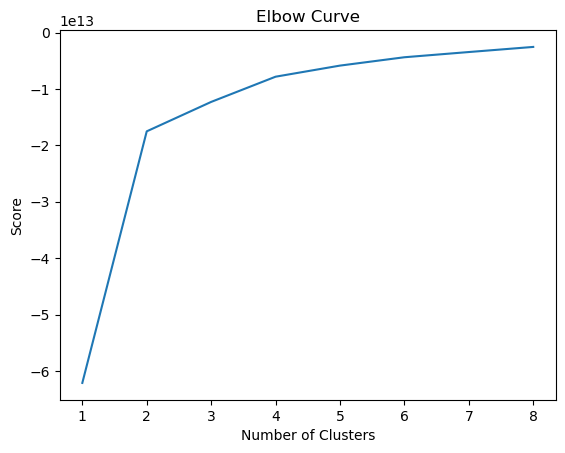

In [21]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score_poultry)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The optimal count for the clusters is four.

### 3. k-means clustering

In [22]:
# create the k-means object

kmeans_poultry = KMeans(n_clusters = 4) 

In [23]:
# fit the k-means object to the data

kmeans_poultry.fit(df_poultry)

KMeans(n_clusters=4)

In [24]:
df_poultry['clusters'] = kmeans_poultry.fit_predict(df_poultry)

In [25]:
df_poultry.head()

,Total live exports,Total live imports,Total meat exports,Total meat imports,Net production (THOUSAND HEAD),Net production (THOUSAND TONS),Area,Total Population,clusters
802,0.259130,3.018973,29.978575,60.496913,62484.34,104.21,83871,8059.591,2
803,0.590199,1.004811,32.159005,59.183236,63335.33,103.49,83871,8098.393,2
804,0.535290,2.390515,29.487985,70.590824,64472.40,107.45,83871,8141.815,2
805,0.742910,3.206919,38.789060,80.150392,65640.86,107.20,83871,8200.618,2
806,0.525840,1.949494,44.435785,89.709292,61738.54,101.64,83871,8253.451,2


In [26]:
df_poultry['clusters'].value_counts()

clusters
2    378
3     74
0     63
1     52
Name: count, dtype: int64

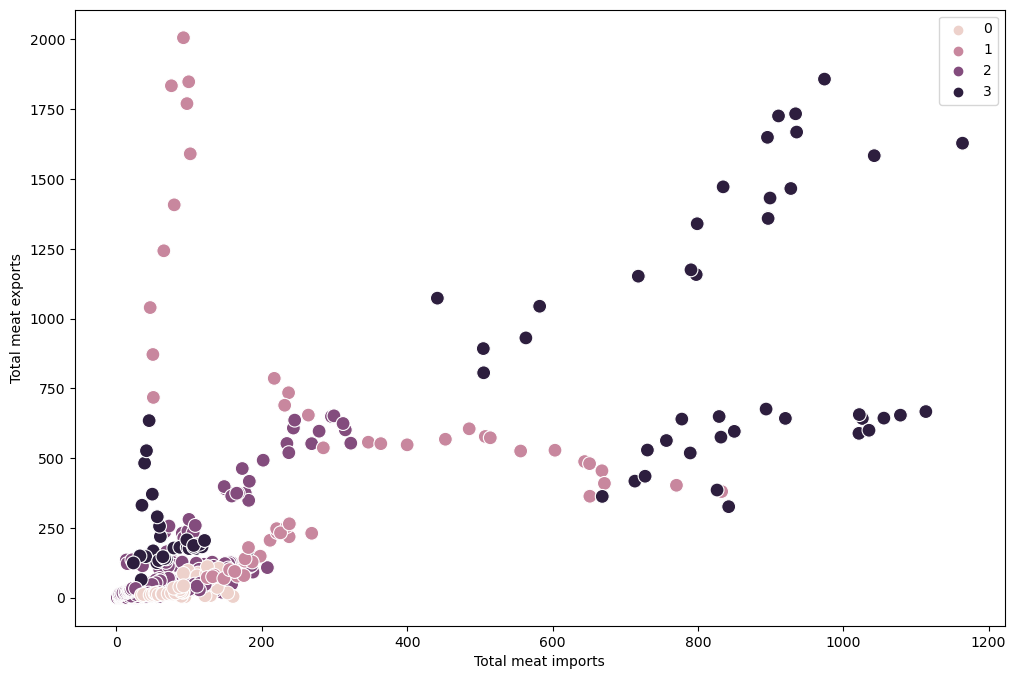

In [27]:
# plot the clusters for the 'Total meat imports' and 'Total meat exports' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_poultry['Total meat imports'], y=df_poultry['Total meat exports'], hue=kmeans_poultry.labels_, s=100) 
ax.grid(False)
plt.xlabel('Total meat imports') 
plt.ylabel('Total meat exports')
plt.show()

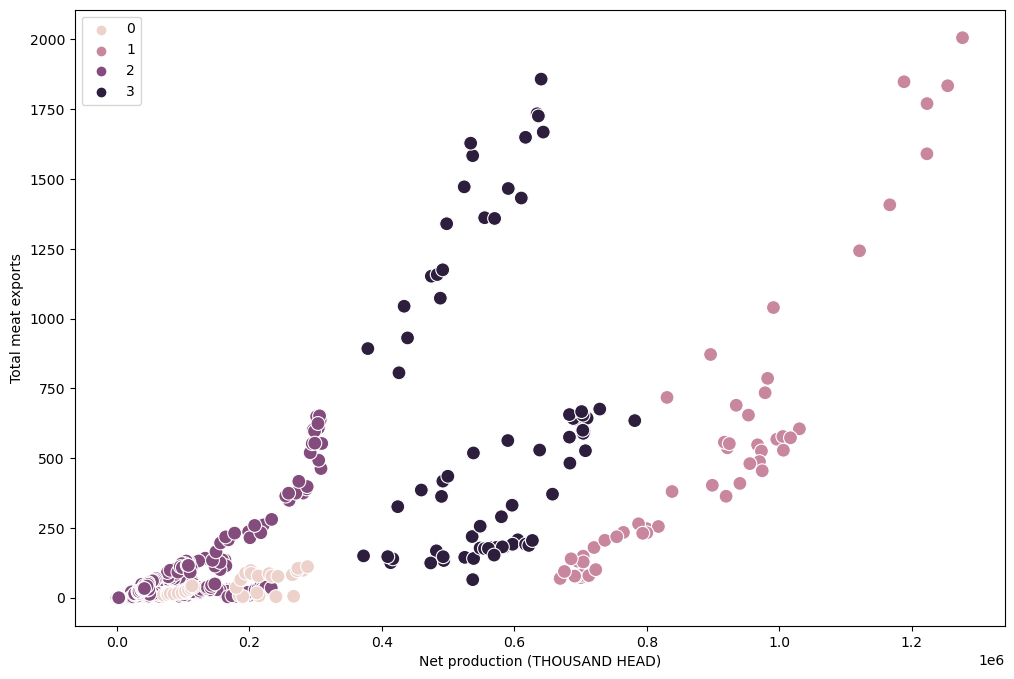

In [28]:
# plot the clusters for the 'Net production (THOUSAND HEAD)' and 'Total meat exports' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_poultry['Net production (THOUSAND HEAD)'], y=df_poultry['Total meat exports'], hue=kmeans_poultry.labels_, s=100) 
ax.grid(False)
plt.xlabel('Net production (THOUSAND HEAD)') 
plt.ylabel('Total meat exports')
plt.show()

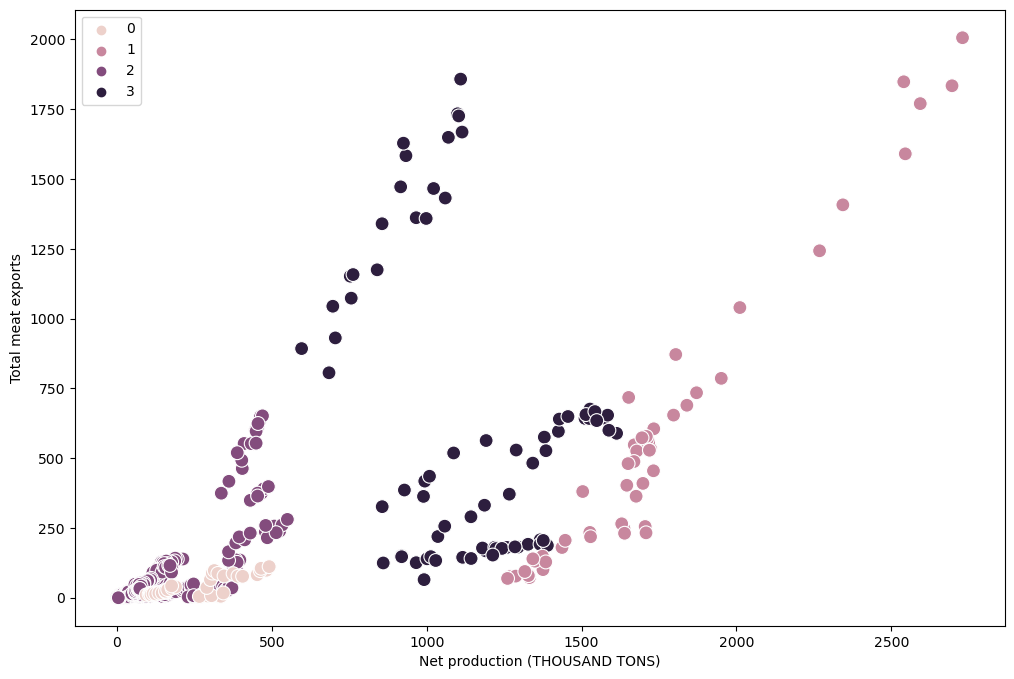

In [29]:
# plot the clusters for the 'Net production (THOUSAND TONS)' and 'Total meat exports' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_poultry['Net production (THOUSAND TONS)'], y=df_poultry['Total meat exports'], hue=kmeans_poultry.labels_, s=100) 
ax.grid(False)
plt.xlabel('Net production (THOUSAND TONS)') 
plt.ylabel('Total meat exports')
plt.show()

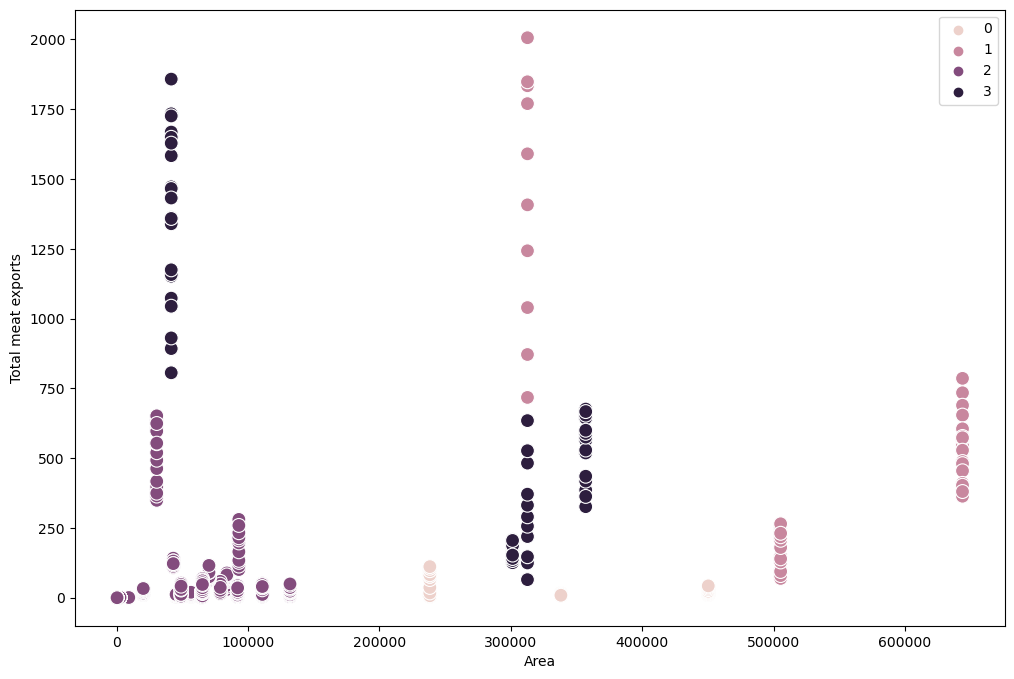

In [30]:
# plot the clusters for the 'Area' and 'Total meat exports' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_poultry['Area'], y=df_poultry['Total meat exports'], hue=kmeans_poultry.labels_, s=100) 
ax.grid(False)
plt.xlabel('Area') 
plt.ylabel('Total meat exports')
plt.show()

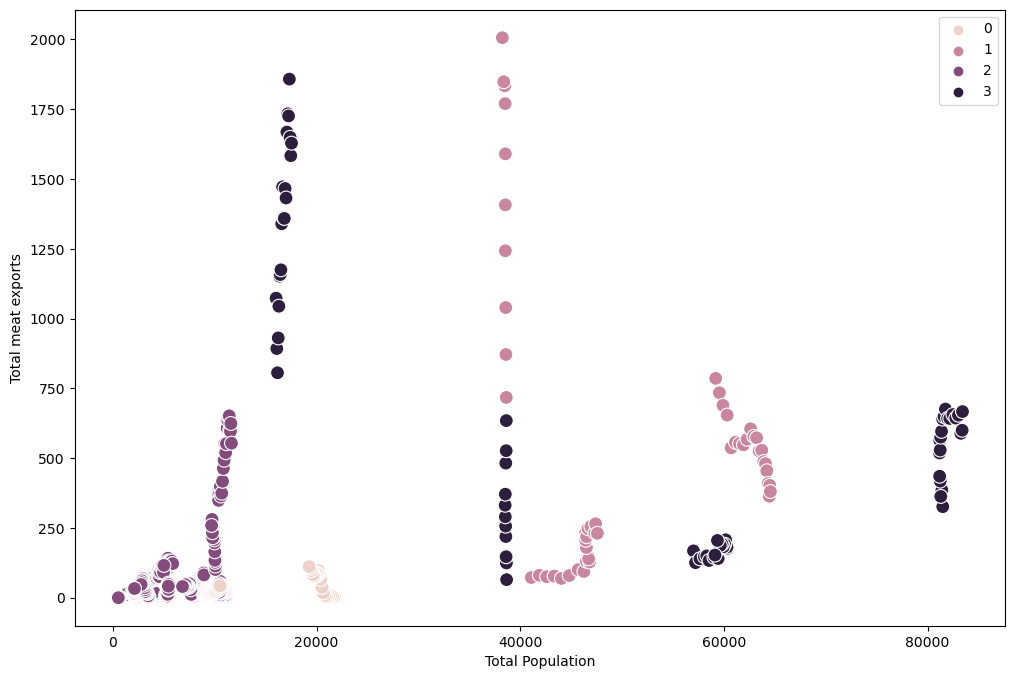

In [31]:
# plot the clusters for the 'Total Population' and 'Total meat exports' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_poultry['Total Population'], y=df_poultry['Total meat exports'], hue=kmeans_poultry.labels_, s=100) 
ax.grid(False)
plt.xlabel('Total Population') 
plt.ylabel('Total meat exports')
plt.show()

In [32]:
# conduct descriptive analysis for each clusters

df_poultry.loc[df_poultry['clusters'] == 3, 'cluster'] = 'dark'
df_poultry.loc[df_poultry['clusters'] == 2, 'cluster'] = 'purple'
df_poultry.loc[df_poultry['clusters'] == 1, 'cluster'] = 'pink'
df_poultry.loc[df_poultry['clusters'] == 0, 'cluster'] = 'light'

In [33]:
df_poultry.groupby('cluster').agg({'Total meat imports':['mean', 'median'], 
                                   'Net production (THOUSAND HEAD)':['mean', 'median'],
                                   'Net production (THOUSAND TONS)':['mean', 'median'], 
                                   'Area':['mean', 'median'],
                                   'Total Population':['mean', 'median'],
                                   'Total meat exports':['mean', 'median']}) 

Total meat imports             Net production (THOUSAND HEAD)  \
                      mean      median                           mean   
cluster                                                                 
dark            512.236007  625.382339                  571533.705504   
light            69.118934   71.295867                  127372.180389   
pink            290.192563  220.810372                  896081.322885   
purple           68.302303   51.128628                   81476.289423   

                       Net production (THOUSAND TONS)              \
                median                           mean      median   
cluster                                                             
dark     569653.287133                    1146.305176  1114.95125   
light     82623.690000                     201.645293   145.32000   
pink     918188.000000                    1720.826538  1677.00000   
purple    54143.220000                     134.927712    98.54500   

                  Area           Total Population              \
                  mean    median             mean      median   
cluster                                                         
dark     245101.891892  301340.0     50550.086135  58429.9030   
light    342277.000000  338145.0     11766.508381   9510.8500   
pink     524220.019231  505370.0     51068.665712  46756.0815   
purple    58208.833333   60591.5      5509.177228   5188.0345   

        Total meat exports              
                      mean      median  
cluster                                 
dark            638.641359  527.821687  
light            29.851910   13.330859  
pink            557.787586  467.532237  
purple           66.177331   22.577687

#### Conclusion

Light or coded as '0' in the legend, appears to be the best cluster because it exhibits both a high mean and median of total meat exports, although it's not the highest.

The mean and median values of total meat imports are 290 and 220 thousand tons, which represent approximately half the volume of the average total meat exports. This suggests that countries in this cluster don't have to import a significant amount of meat in order to export.

Conversely, the high quantity of net production in both head and ton units is likely the primary driver of export volume. 

Furthermore, countries with larger land areas would generally have a higher capacity for farming and exporting poultry.

The total population of the countries does not necessarily have to be high. Larger populations may indeed consume more meat domestically, leaving less available for export. However, it's worth considering that a larger population can be an advantage if there is strong domestic demand for meat, and if the country can balance both domestic consumption and exports effectively.

## Commodity : Tomatoes

### 1. Importing data

In [34]:
# import a dataframe

df_tomatoes = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'tomatoes.csv'), index_col=False)

In [35]:
df_tomatoes.head()

,Unnamed: 0,Country,Year,Exports (Extra-EU) (THOUSAND TONS),Exports (Intra-EU) (THOUSAND TONS),Imports (Extra-EU) (THOUSAND TONS),Imports (Intra-EU) (THOUSAND TONS),Area (SQ.KM.),Total Population (THOUSAND PEOPLE),Total Exports (THOUSAND TONS),Total Imports (THOUSAND TONS)
0,1117,Austria,2002,3.227088,13.033619,17.572010,146.206248,83871,8059.591,16.260707,163.778258
1,1118,Austria,2003,3.610107,19.905530,21.626479,167.255916,83871,8098.393,23.515637,188.882395
2,1119,Austria,2004,2.773789,18.605083,26.475557,180.753277,83871,8141.815,21.378872,207.228834
3,1120,Austria,2005,2.853383,22.794955,34.299829,167.505189,83871,8200.618,25.648338,201.805018
4,1121,Austria,2006,2.403822,22.471847,17.946673,178.540804,83871,8253.451,24.875669,196.487477


In [36]:
# remove categorical columns

df_tomatoes = df_tomatoes[['Exports (Extra-EU) (THOUSAND TONS)',
                           'Exports (Intra-EU) (THOUSAND TONS)',
                           'Imports (Extra-EU) (THOUSAND TONS)',
                           'Imports (Intra-EU) (THOUSAND TONS)',
                           'Total Exports (THOUSAND TONS)',
                           'Total Imports (THOUSAND TONS)',
                           'Area (SQ.KM.)', 
                           'Total Population (THOUSAND PEOPLE)']]

In [37]:
df_tomatoes.head()

,Exports (Extra-EU) (THOUSAND TONS),Exports (Intra-EU) (THOUSAND TONS),Imports (Extra-EU) (THOUSAND TONS),Imports (Intra-EU) (THOUSAND TONS),Total Exports (THOUSAND TONS),Total Imports (THOUSAND TONS),Area (SQ.KM.),Total Population (THOUSAND PEOPLE)
0,3.227088,13.033619,17.572010,146.206248,16.260707,163.778258,83871,8059.591
1,3.610107,19.905530,21.626479,167.255916,23.515637,188.882395,83871,8098.393
2,2.773789,18.605083,26.475557,180.753277,21.378872,207.228834,83871,8141.815
3,2.853383,22.794955,34.299829,167.505189,25.648338,201.805018,83871,8200.618
4,2.403822,22.471847,17.946673,178.540804,24.875669,196.487477,83871,8253.451


### 2. The elbow technique

In [38]:
# defines the range of potential clusters in the data

num_cl = range(1, 9)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [39]:
# creates a score that represents a rate of variation for the given cluster option

score_tomatoes = [kmeans[i].fit(df_tomatoes).score(df_tomatoes) for i in range(len(kmeans))] 

In [40]:
score_tomatoes

[-16664592229661.479,
 -3174636191551.3184,
 -1205177917008.7578,
 -802431335047.159,
 -466791689183.3069,
 -324605760798.6481,
 -231042729435.38306,
 -171713722111.68]

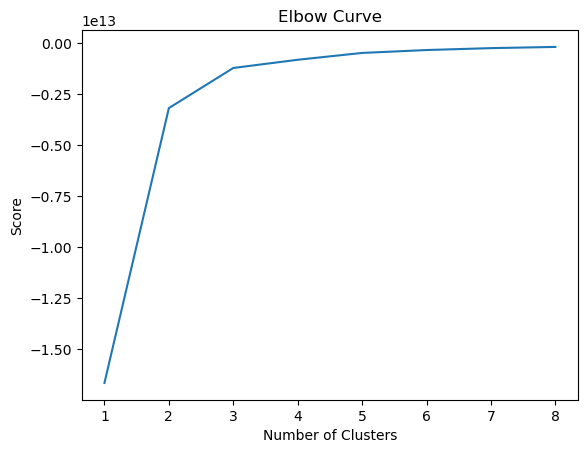

In [41]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score_tomatoes)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The optimal count for the clusters is three.

### 3. k-means clustering

In [42]:
# create the k-means object

kmeans_tomatoes = KMeans(n_clusters = 3) 

In [43]:
# fit the k-means object to the data

kmeans_tomatoes.fit(df_tomatoes)

KMeans(n_clusters=3)

In [44]:
df_tomatoes['clusters'] = kmeans_tomatoes.fit_predict(df_tomatoes)

In [45]:
df_tomatoes['clusters'].value_counts()

clusters
0    399
2    105
1     63
Name: count, dtype: int64

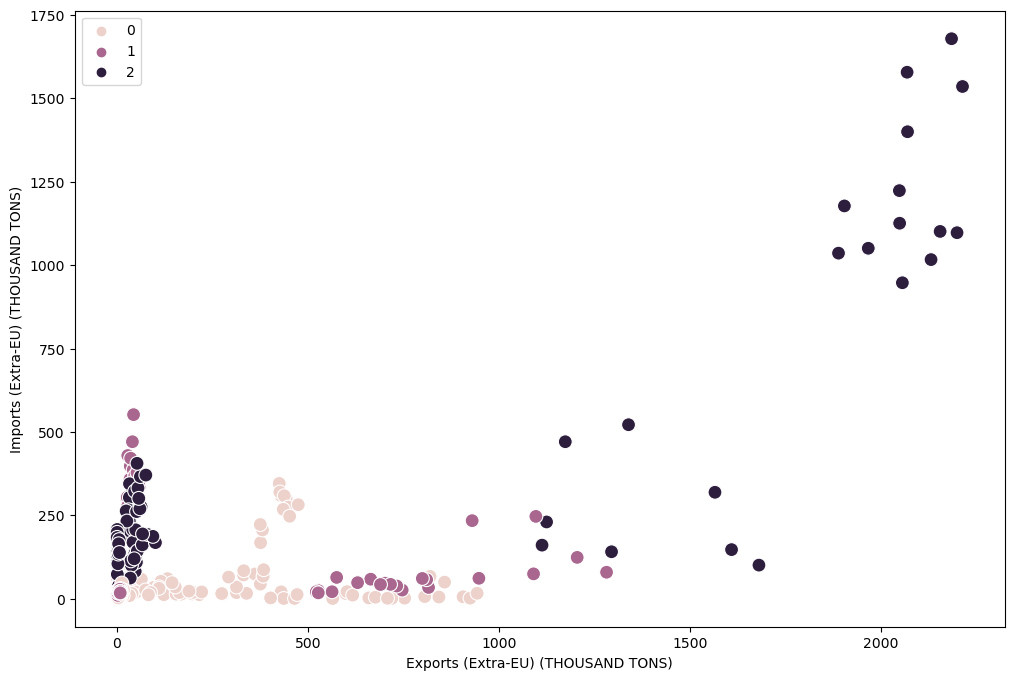

In [50]:
# plot the clusters for the 'Exports (Extra-EU) (THOUSAND TONS)' and 'Imports (Extra-EU) (THOUSAND TONS)' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_tomatoes['Exports (Extra-EU) (THOUSAND TONS)'], y=df_tomatoes['Imports (Extra-EU) (THOUSAND TONS)'], hue=kmeans_tomatoes.labels_, s=100) 
ax.grid(False)
plt.xlabel('Exports (Extra-EU) (THOUSAND TONS)') 
plt.ylabel('Imports (Extra-EU) (THOUSAND TONS)')
plt.show()

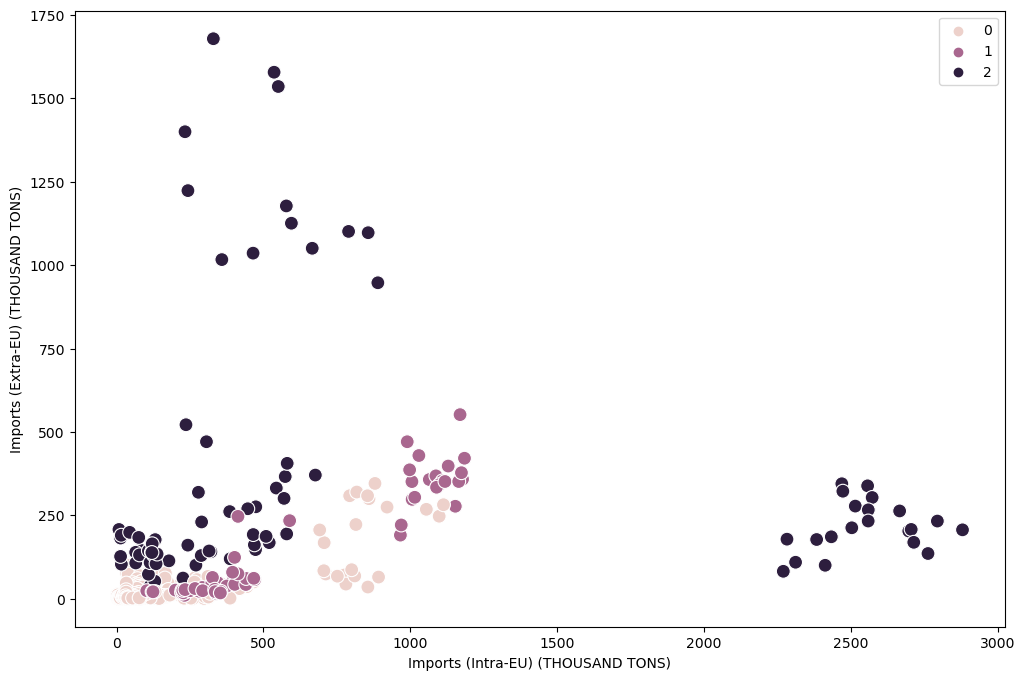

In [46]:
# plot the clusters for the 'Imports (Intra-EU) (THOUSAND TONS)' and 'Imports (Extra-EU) (THOUSAND TONS)' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_tomatoes['Imports (Intra-EU) (THOUSAND TONS)'], y=df_tomatoes['Imports (Extra-EU) (THOUSAND TONS)'], hue=kmeans_tomatoes.labels_, s=100) 
ax.grid(False)
plt.xlabel('Imports (Intra-EU) (THOUSAND TONS)') 
plt.ylabel('Imports (Extra-EU) (THOUSAND TONS)')
plt.show()

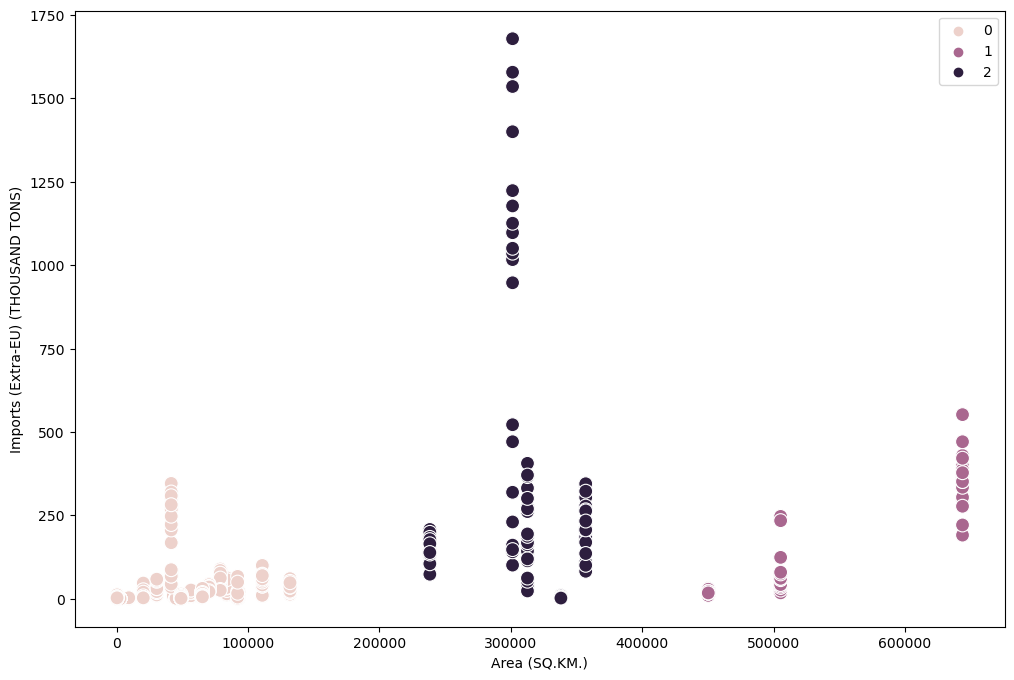

In [47]:
# plot the clusters for the 'Area (SQ.KM.)' and 'Imports (Extra-EU) (THOUSAND TONS)' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_tomatoes['Area (SQ.KM.)'], y=df_tomatoes['Imports (Extra-EU) (THOUSAND TONS)'], hue=kmeans_tomatoes.labels_, s=100) 
ax.grid(False)
plt.xlabel('Area (SQ.KM.)') 
plt.ylabel('Imports (Extra-EU) (THOUSAND TONS)')
plt.show()

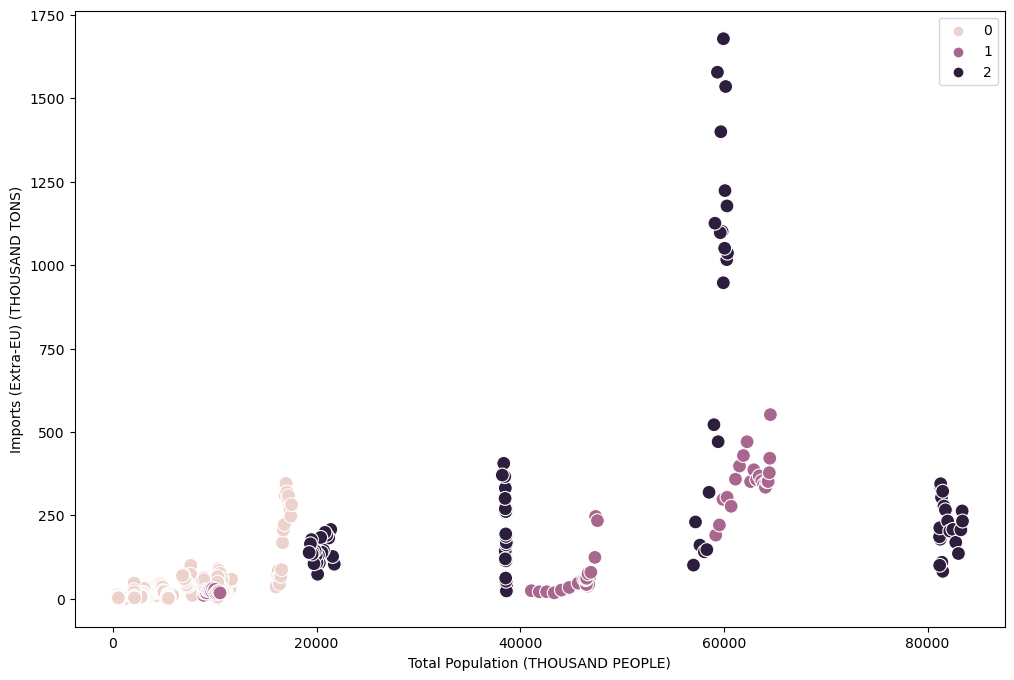

In [48]:
# plot the clusters for the 'Total Population (THOUSAND PEOPLE)' and 'Imports (Extra-EU) (THOUSAND TONS)' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_tomatoes['Total Population (THOUSAND PEOPLE)'], y=df_tomatoes['Imports (Extra-EU) (THOUSAND TONS)'], hue=kmeans_tomatoes.labels_, s=100) 
ax.grid(False)
plt.xlabel('Total Population (THOUSAND PEOPLE)') 
plt.ylabel('Imports (Extra-EU) (THOUSAND TONS)')
plt.show()

In [49]:
# conduct descriptive analysis for each clusters

df_tomatoes.loc[df_tomatoes['clusters'] == 2, 'cluster'] = 'dark'
df_tomatoes.loc[df_tomatoes['clusters'] == 1, 'cluster'] = 'pink'
df_tomatoes.loc[df_tomatoes['clusters'] == 0, 'cluster'] = 'light'

In [51]:
df_tomatoes.groupby('cluster').agg({'Exports (Extra-EU) (THOUSAND TONS)':['mean', 'median'], 
                                    'Imports (Intra-EU) (THOUSAND TONS)':['mean', 'median'],
                                    'Area (SQ.KM.)':['mean', 'median'],
                                    'Total Population (THOUSAND PEOPLE)':['mean', 'median'],
                                    'Imports (Extra-EU) (THOUSAND TONS)':['mean', 'median']}) 

Exports (Extra-EU) (THOUSAND TONS)             \
                                      mean     median   
cluster                                                 
dark                            379.453929  34.513318   
light                            73.604301   2.834359   
pink                            278.832349  42.385229   

        Imports (Intra-EU) (THOUSAND TONS)              Area (SQ.KM.)  \
                                      mean      median           mean   
cluster                                                                 
dark                            715.814646  278.547195  309516.600000   
light                           132.415245   64.307618   57331.684211   
pink                            566.638994  394.706120  533155.333333   

                  Total Population (THOUSAND PEOPLE)             \
           median                               mean     median   
cluster                                                           
dark     312685.0                       41081.724352  38565.593   
light     56594.0                        6101.473170   5393.596   
pink     505370.0                       39237.573952  46488.330   

        Imports (Extra-EU) (THOUSAND TONS)              
                                      mean      median  
cluster                                                 
dark                            284.947298  164.616136  
light                            26.372587   12.284868  
pink                            148.842717   48.147034

#### Conclusion

The dark cluster or coded as '2' in the legend, appears to be the best cluster because it exhibits both a high mean and median of tomatoes imports from outside the EU.

The countries that have high quantity of Exports to destination outside the EU tend to import high quantity of tomatoes from outside the EU.

Conversely, from the chart, if we exclude the dark dots with imports (Extra-EU) higher than 750 thousand tons, it demonstrates that the higher imports within EU, the lower imports from outside the EU.

Countries with middium land areas have a higher quantity of tomatoes import from outside the EU.

The total population of the countries does not necessarily have to be high. Larger populations may indeed consume more tomatoes domestically, leaving less available for export. However, it's worth considering that a larger population can be an advantage if there is strong domestic demand for tomatoes, and if the country can balance both domestic consumption and exports effectively.

##### Tip! "The determination of the "best" cluster in cluster analysis relies on the specific context and goals of the analysis. Factors such as mean and median comparisons, domain-specific insights, and visualization aid in identifying meaningful clusters. The choice of the best cluster depends on the study's objectives, with options including exploratory analysis, predictive modeling using cluster labels as features, or informing decision-making processes based on business goals."